In [1]:
import pandas as pd
import ternary
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('talk')

from borfr import BO_RFR, fps
import warnings
warnings.filterwarnings("ignore")
from synth_data.plotting_helpers_mixture_frederic import plot_mixture_4d

data = pd.read_csv('synth_data/test_results_ensemble_30models.csv')

In [2]:
all_els = ['Ni','Al','Cu','Pt','Zn',]

#els = ['Mo','Ce','Ti','Ba']
els = ['Ni','Al','Cu','Pt','Zn','O']

inds = []
for ii,i in enumerate(data['comp'].values):
    if (els[0] in i)&(els[1] in i)&(els[2] in i)&(els[3] in i)&(len(i.split(' '))==4):
        inds.append(ii)
    elif (els[0] in i)&(els[1] in i)&(els[2] in i)&(len(i.split(' '))==3):
        inds.append(ii)
    elif (els[0] in i)&(els[1] in i)&(els[3] in i)&(len(i.split(' '))==3):
        inds.append(ii)
    elif (els[1] in i)&(els[2] in i)&(els[3] in i)&(len(i.split(' '))==3):
        inds.append(ii)

inds = np.arange(data.values.shape[0])

print(len(inds))


53124


In [3]:
comps = data['comp'].values[inds]
score = data['score'].values[inds]

In [4]:
cm = []
for ci in comps:
    sp = ci.split(' ')
    line = np.zeros(6)
    for si in sp:
        try:
            val = float(si[-2:])
        except:
            val = float(si[-1:])
        try:
            ind = els.index(si[:2])
        except:
            ind = els.index(si[:1])
        line[ind] = val
    cm.append(line)
cm = np.vstack(cm)

<Axes3D: >

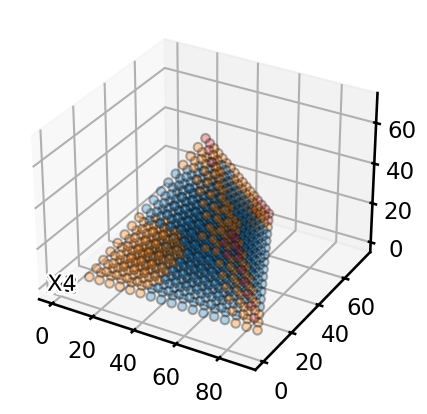

In [5]:
labels = np.zeros(score.shape)
labels[(score>.5)&(cm[:,-1]!=0)] = 1.
labels[(score>.5)&(cm[:,-1]==0)] = 2.
labels[(score>.8)&(cm[:,-1]!=0)] = 3.
labels[(score>.8)&(cm[:,-1]==0)] = 4.

inds = set([0,2,3,5])
ninds = set(range(len(els)))-inds
pl = []
cmp = []
for ii,i in enumerate(cm):
    nz = set(np.where(i==0)[0])
    if nz == ninds:
        cmp.append(ii)
plot_mixture_4d([pd.DataFrame(cm[:,list(inds)][cmp])],[labels[cmp]])

NameError: name 'f' is not defined

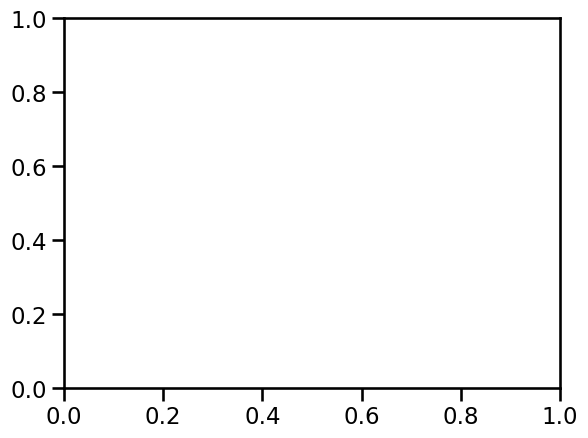

In [6]:
from dexpy.cox_effects import generate_cox_points

i = 5

refp = np.ones(6)*0.2
refp[i] = 0
vec = generate_cox_points(refp, i, 50)

fig,ax = plt.subplots()
ax.plot([f(vi) for vi in vec])

In [7]:
np.sum(refp)

1.0

(array([6332., 4664., 3749., 3355., 3148., 2802., 2600., 2306., 2084.,
        2014., 1736., 1644., 1557., 1358., 1315., 1251., 1209., 1130.,
        1205., 1154., 1092.,  983.,  887.,  861.,  785.,  684.,  473.,
         337.,  274.,  135.]),
 array([1.44278651e-04, 3.26566836e-02, 6.51690886e-02, 9.76814936e-02,
        1.30193899e-01, 1.62706304e-01, 1.95218709e-01, 2.27731114e-01,
        2.60243519e-01, 2.92755924e-01, 3.25268329e-01, 3.57780734e-01,
        3.90293139e-01, 4.22805544e-01, 4.55317949e-01, 4.87830354e-01,
        5.20342759e-01, 5.52855164e-01, 5.85367569e-01, 6.17879974e-01,
        6.50392379e-01, 6.82904784e-01, 7.15417189e-01, 7.47929594e-01,
        7.80441999e-01, 8.12954404e-01, 8.45466809e-01, 8.77979214e-01,
        9.10491619e-01, 9.43004024e-01, 9.75516429e-01]),
 <BarContainer object of 30 artists>)

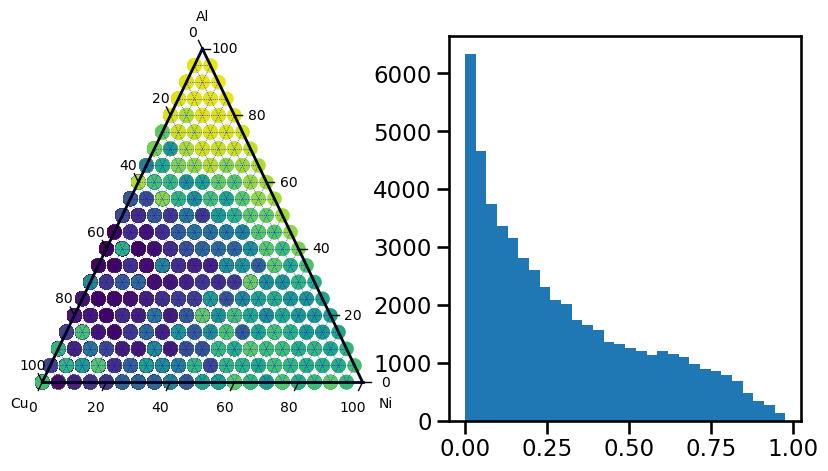

In [8]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fontsize=10
tax = ternary.TernaryAxesSubplot(ax=ax1, scale=100)
tax.scatter(cm, c=score)
tax.ticks(axis='lbr', multiple=20, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)
tax.right_corner_label(els[0], fontsize=fontsize)
tax.top_corner_label(els[1], fontsize=fontsize)
tax.left_corner_label(els[2], fontsize=fontsize)
ax2.hist(score,bins=30)

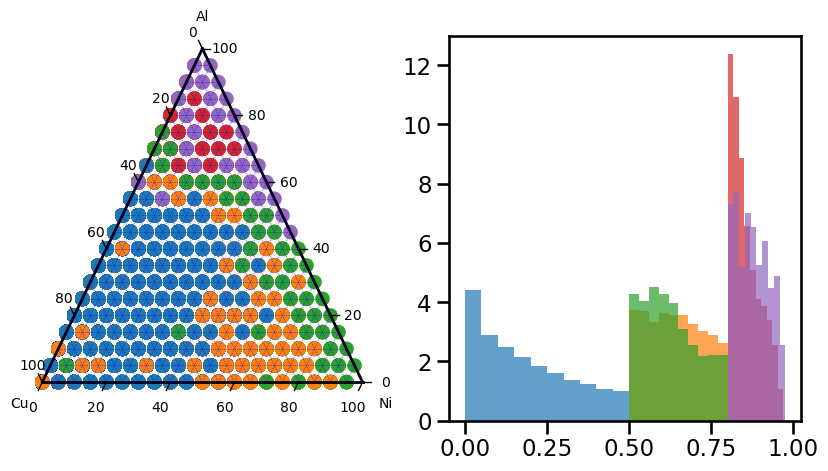

In [9]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

#bgm = BayesianGaussianMixture(n_components=2).fit(score.reshape(-1,1))
#labels = bgm.predict(score.reshape(-1,1))
labels = np.zeros(score.shape)
labels[(score>.5)&(cm[:,-1]!=0)] = 1.
labels[(score>.5)&(cm[:,-1]==0)] = 2.
labels[(score>.8)&(cm[:,-1]!=0)] = 3.
labels[(score>.8)&(cm[:,-1]==0)] = 4.

try:
    fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
    fontsize=10
    tax = ternary.TernaryAxesSubplot(ax=ax1, scale=100)
    tax.scatter(cm, c=labels,cmap='tab10',vmin=0,vmax=10)
    tax.ticks(axis='lbr', multiple=20, linewidth=1, offset=0.025)
    tax.get_axes().axis('off')
    tax.clear_matplotlib_ticks()
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="blue", multiple=5)
    tax.right_corner_label(els[0], fontsize=fontsize)
    tax.top_corner_label(els[1], fontsize=fontsize)
    tax.left_corner_label(els[2], fontsize=fontsize)
    for i in np.unique(labels):
        ax2.hist(score[labels==i],density=True, alpha=0.7)
except:
    pass

In [10]:
def f(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return vals[ind]

def get_label(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return ref_labels[ind]

x = y = np.linspace(-1,1,50)
mesh = np.meshgrid(x,y)
xy = np.vstack([m.ravel() for m in mesh]).T

grid = cm
vals = score
ref_labels = labels

In [11]:
np.random.seed(42)

X_init = fps(grid,50)
y_init = np.array([f(xi) for xi in X_init])

x_test = fps(grid,10000)

In [12]:
regm = 'RFC'
clm = 'RFC'


n_iter = 400
nb = 1
n_iter_b = int(n_iter/nb)

esl = 'AC'

bor = BO_RFR(X_init, y_init, grid, f, x_test, 
             acq='BO',gl = get_label, cl_weight=.3, 
             est_labels=esl, N_batch=nb, 
             class_method = clm, reg_method = regm, k_adaptive=True)

bor.run(n_iter_b)

rand_scores = []
for i in range(2):
    rand = BO_RFR(X_init, y_init, grid, f, x_test, 
                  acq='random',gl = get_label,  
                  est_labels=esl, N_batch=1,
                  class_method = clm, reg_method = regm)
    
    rand.run(n_iter)
    rand_scores.append(rand.scores)


sf = BO_RFR(X_init, y_init, grid, f, x_test, 
            acq='SF',gl = get_label, 
            est_labels=esl, N_batch=1,
            class_method = clm, reg_method = regm)

sf.run(n_iter)

gp = BO_RFR(X_init, y_init, grid, f, x_test, 
            acq='SF',gl = get_label, 
            est_labels=esl, N_batch=1,
            class_method = clm, reg_method = regm, gpr=True)

gp.run(n_iter)

generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:30<00:00, 326.82it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [07:46<00:00,  1.17s/it]


generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:30<00:00, 332.79it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [02:59<00:00,  2.23it/s]


generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:31<00:00, 319.73it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [02:57<00:00,  2.25it/s]


generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:31<00:00, 319.85it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [03:21<00:00,  1.98it/s]


generating test data


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:31<00:00, 313.50it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [04:42<00:00,  1.41it/s]


In [ ]:
n_iter = 400
nb = 5
n_iter_b = int(n_iter/nb)

esl = 'known'

bor = BO_RFR(X_init, y_init, grid, f, x_test, 
             acq='BO',gl = get_label, cl_weight=1.5, 
             est_labels=esl, N_batch=nb, 
             class_method = clm, reg_method = regm, k_adaptive=True)

bor.run(n_iter_b)

generating test data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1064.87it/s]


running iterative exploration:


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 65/80 [01:18<00:21,  1.46s/it]

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fontsize=10
tax = ternary.TernaryAxesSubplot(ax=ax1, scale=100)
tax.scatter(cm, c=bor.classifier.predict(grid),cmap='tab10',vmin=0,vmax=10)
tax.ticks(axis='lbr', multiple=20, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)
tax.right_corner_label(els[0], fontsize=fontsize)
tax.top_corner_label(els[1], fontsize=fontsize)
tax.left_corner_label(els[2], fontsize=fontsize)
tax.scatter(bor.X, c='k', marker='x')
tax.scatter(X_init, c='k', marker='s')

ax2.plot(np.arange(bor.n_iters+1)*nb,bor.scores,lw=3,alpha=0.8, label='BO')
ax2.plot(np.arange(rand.n_iters+1),rand.scores,lw=3,alpha=0.8, label='random')
ax2.plot(np.arange(sf.n_iters+1),sf.scores,lw=3,alpha=0.8, label='SF')
ax2.plot(np.arange(gp.n_iters+1),gp.scores,lw=3,alpha=0.8, label='GPR')
ax2.set_title('Final score: %.3f'%bor.scores[-1])
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('R$_2$ score')
ax2.set_ylim(-1,1)
ax2.legend()
plt.tight_layout()

In [17]:
from sklearn.metrics import f1_score
for m in (bor,rand,sf):
    print(f1_score(ref_labels, m.classifier.predict(grid), average='weighted'))

0.09978381720951403
0.676566765339874
0.6765811171692673


In [30]:
for m in (bor,rand,sf):
    E = vals - m.model.predict(grid)
    RMSE = np.sqrt(np.mean(E**2))
    print(RMSE)

0.11177175354722879
0.11261633945898393
0.101447461125896


In [31]:
gpr = BO_RFR(X_init, y_init, grid, f, x_test, acq='SF',gl = get_label, cl_weight=0.3, est_labels='known', N_batch=1, gpr=True)

gpr.run(n_iter)
gpr.scores[-1]

generating test data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:09<00:00, 1032.54it/s]


running iterative exploration:


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [05:24<00:00,  1.23it/s]


-15.542053612168825

In [47]:
for i in np.unique(bor.labels.ravel()):
    print(np.mean(bor.y[bor.labels.ravel()==i]))

0.425722082315382
0.915191521247228
0.843200718694263


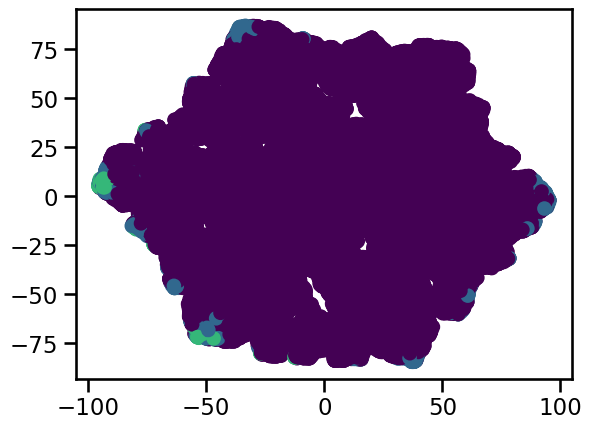

In [53]:
from sklearn.manifold import TSNE

tsne = TSNE().fit_transform(grid)
fig,ax = plt.subplots()
ax.scatter(*tsne.T, c= bor.classifier.predict(grid))

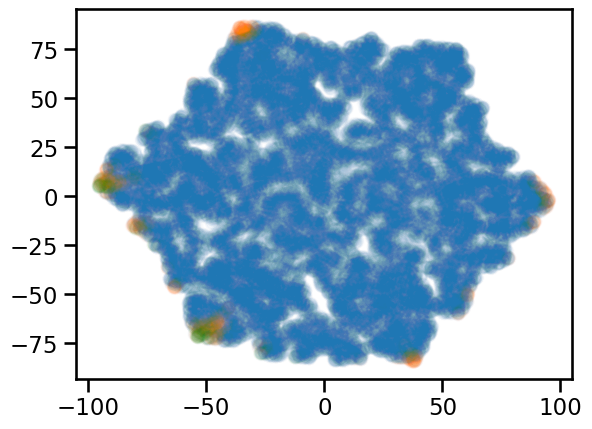

In [55]:
fig,ax = plt.subplots()
ax.scatter(*tsne.T, c= bor.classifier.predict(grid), vmin = 0,vmax=10,cmap='tab10', alpha=0.01)